<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# Support Vector Machines (SVMs) using scikit-learn in Python - Project Overview
### Let's tain and deploy SVMs on another dataset from UCI Machine Learning Repository 
### [Statlog (Australian Credit Approval) Data Set ](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29)<br>

This real dataset concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. <br>

You can download the datafile from the UCI website or use the one which is processed and provided in the course material. Later on, you can download the file from UCI website and do the data cleaning your self for practice your skills. <br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read the datafile and display the head of your dataframe**

In [3]:
#Code here please, so that you dont lose the output
df = pd.read_csv('Aust_Credit_Approval_Data.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
0,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
0,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
#Code here please, so that you dont lose the output
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
x1        690 non-null float64
x2        690 non-null float64
x3        690 non-null int64
x4        690 non-null int64
x5        690 non-null int64
x6        690 non-null float64
x7        690 non-null int64
x8        690 non-null int64
x9        690 non-null int64
x10       690 non-null int64
x11       690 non-null int64
x12       690 non-null int64
x13       690 non-null int64
target    690 non-null int64
dtypes: float64(3), int64(11)
memory usage: 75.5 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
x1        690 non-null float64
x2        690 non-null float64
x3        690 non-null int64
x4        690 non-null int64
x5        690 non-null int64
x6        690 non-null float64
x7        690 non-null int64
x8        690 non-null int64
x9        690 non-null int64
x10       690 non-null int64
x11       690 non-null int64
x12       690 non-null int64
x13       690 non-null int64
target    690 non-null int64
dtypes: float64(3), int64(11)
memory usage: 75.5 KB


In [5]:
#Code here please, so that you dont lose the output
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


## EDA
The features are hidden and renamed with some x1 to x13. We can do the pair plot but this would be big!. Let's do some assumptions and explore the data. 
### &#9989;  Please note, all the EDA is after assuming a specific feature for specific column, this is not true and assumtions are made for practice the EDA skills only. 

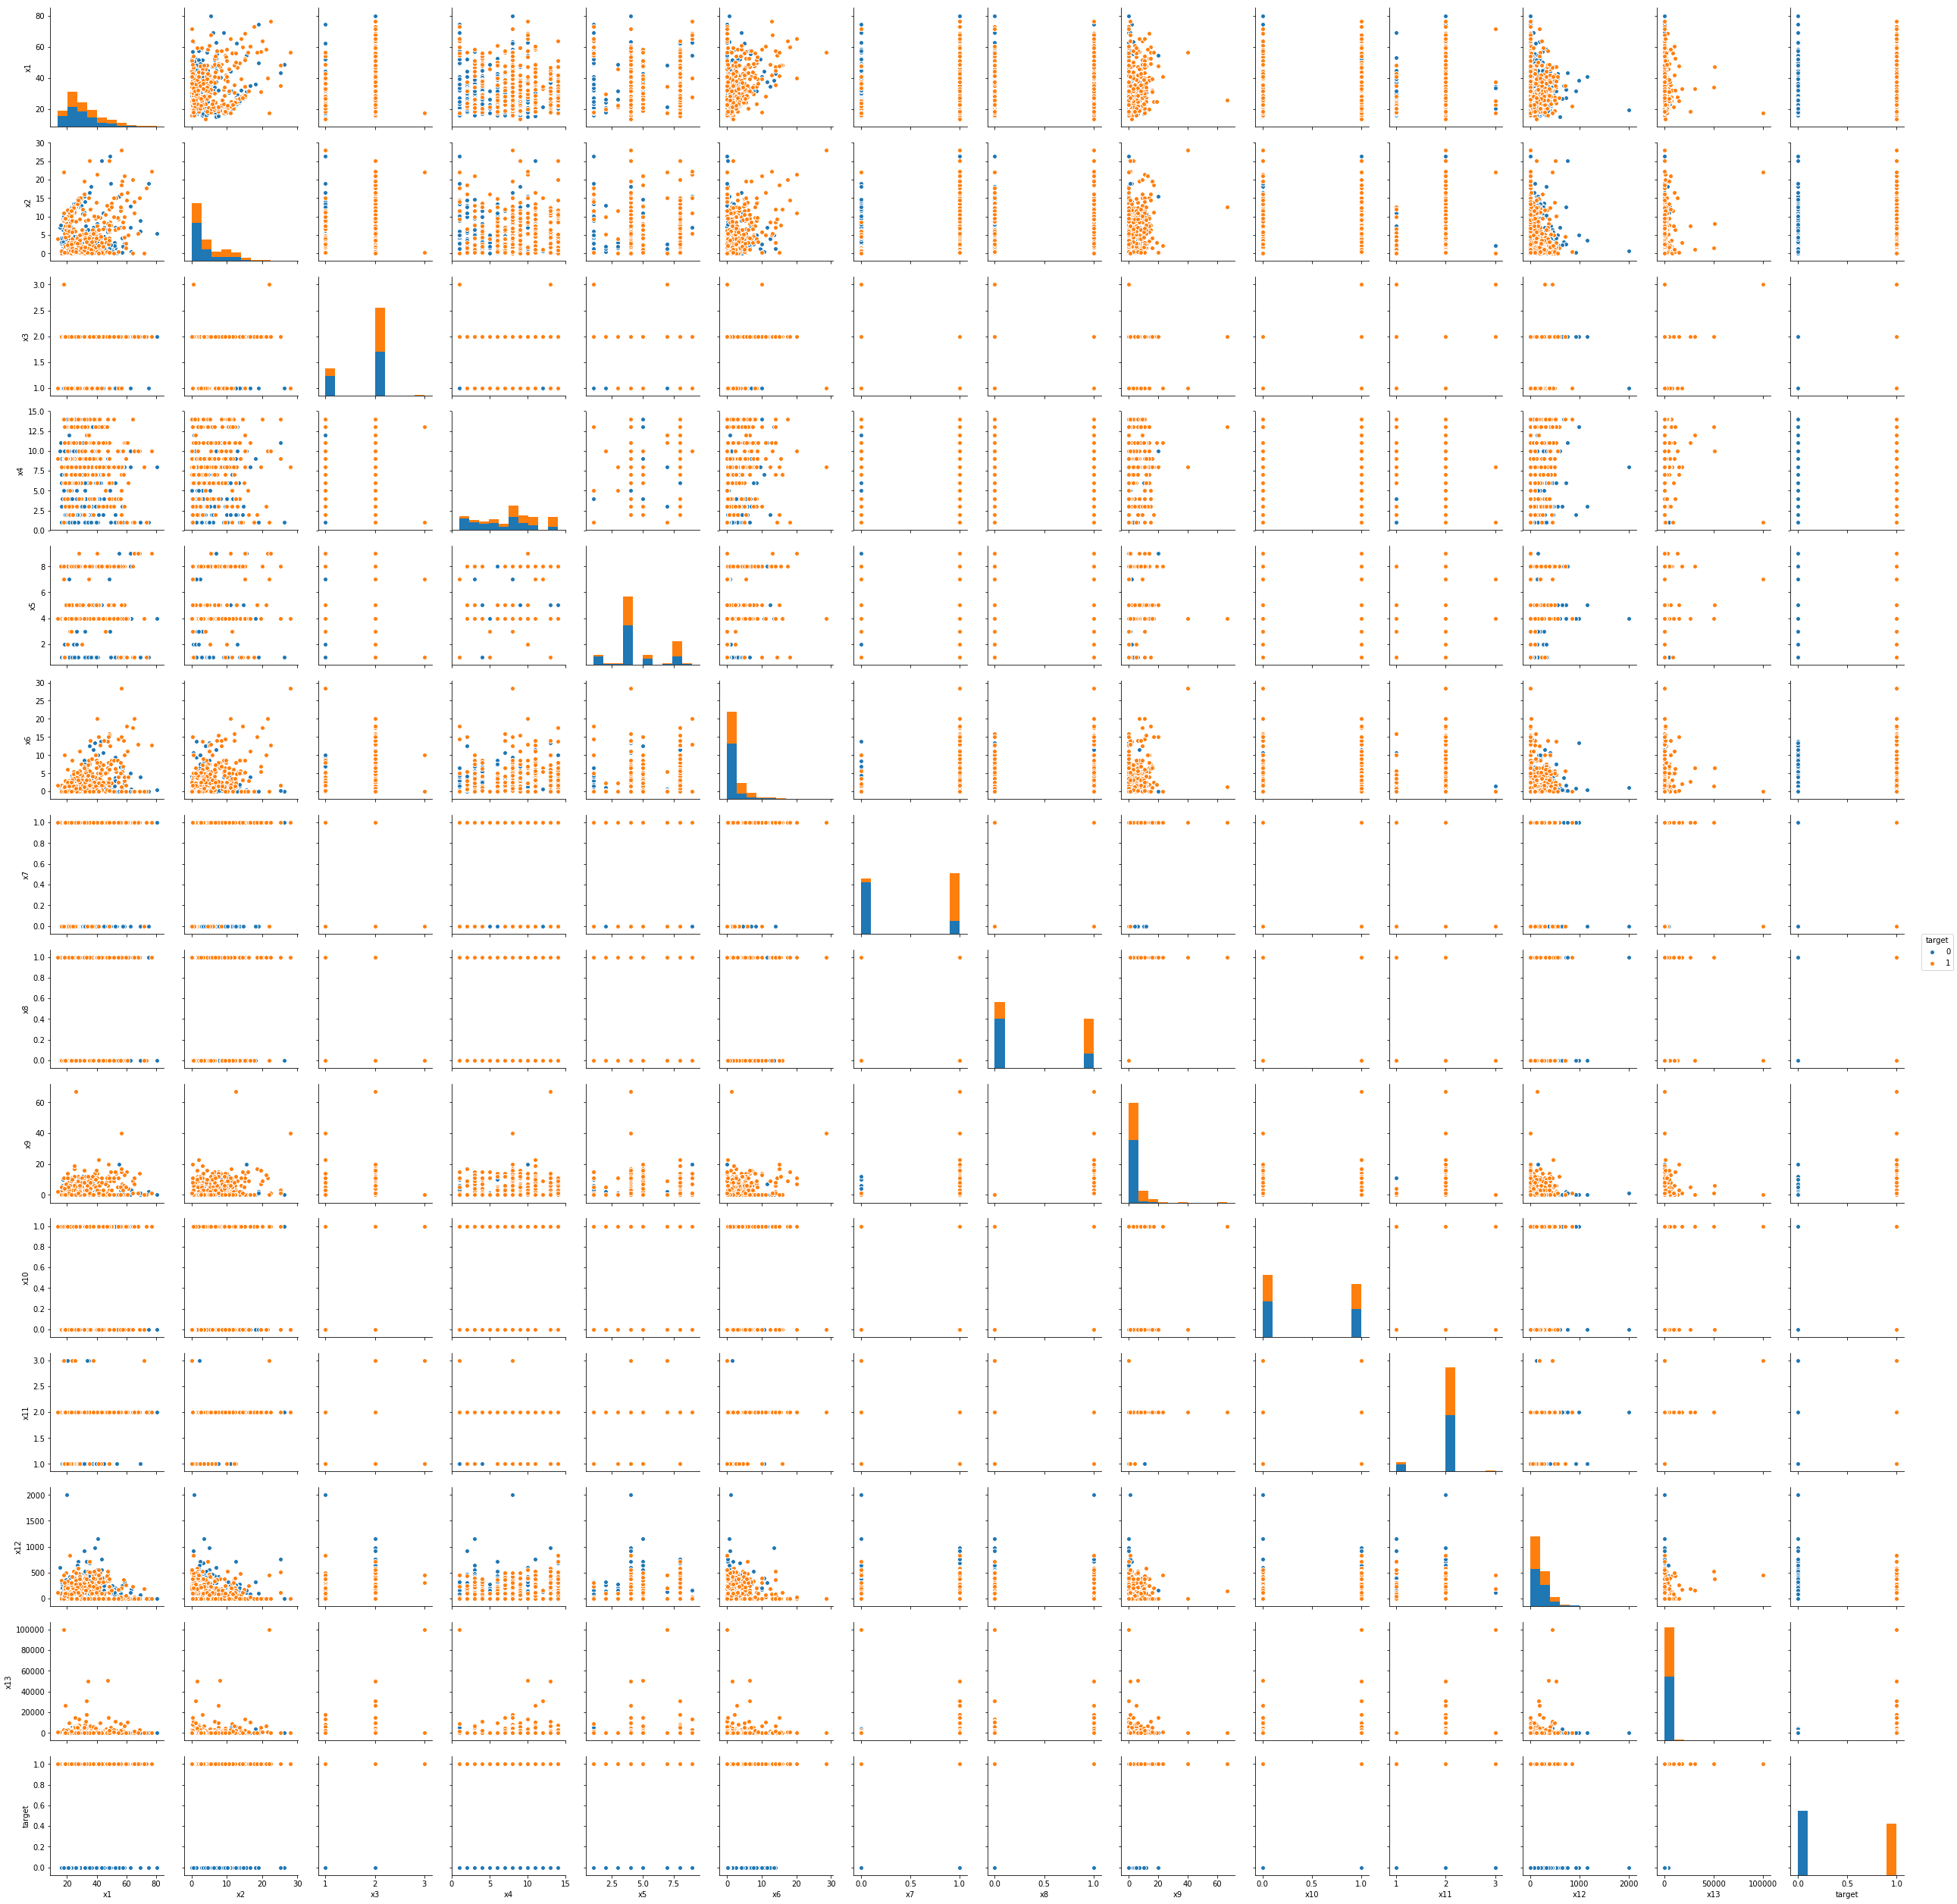

In [6]:
#sns.pairplot(df, hue='target')

**How many persons could not get approval?**

In [7]:
#Code here please, so that you dont lose the output
df['target'].value_counts()

0    383
1    307
Name: target, dtype: int64

0    383
1    307
Name: target, dtype: int64

**Considering x8 as a sex (male 1 and female 0), which sex have better chances for credit approval? Re-create the plot below.**

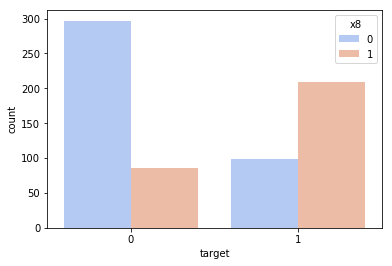

In [11]:
#Code here please, so that you dont lose the output
df['x8'].value_counts()
sns.countplot(data = df, x='target', hue='x8',palette='coolwarm')

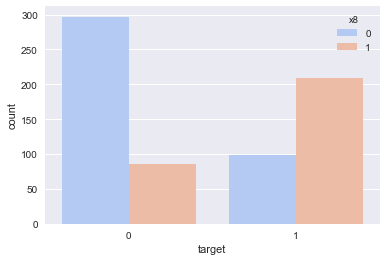

**Considering x4 as a credit score, which score is the highest number of counts? re-create the plot below**

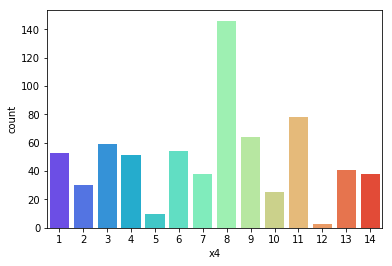

In [16]:
#Code here please, so that you dont lose the output
df['x4'].value_counts()
sns.countplot(data = df, x = 'x4',palette='rainbow')

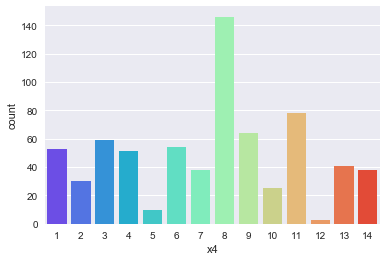

**Once again, with our assumptions: x8:sex and x4:credit score, what is the probability for male and female to get approved if the score is greater than 7? Create a count plot please**

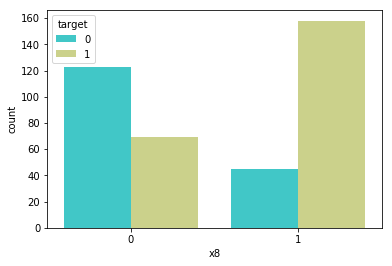

In [20]:
#Code here please, so that you dont lose the output
sns.countplot(data = df[df['x4']>7],x= 'x8', hue='target',palette='rainbow')

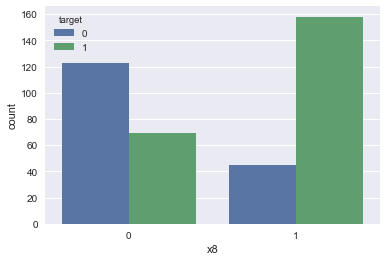

**Looks like x1 is age, let's assume it is, What age is the common for people to apply for credit?** Create the plot belwo.

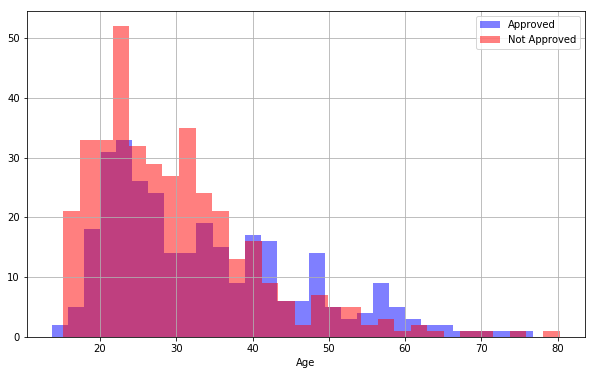

In [28]:
#Code here please, so that you dont lose the output
fig = plt.figure(figsize=(10,6))
df[df['target']==1]['x1'].hist(bins = 30,color = 'blue',label='Approved',alpha = 0.5)
df[df['target']==0]['x1'].hist(bins = 30,color = 'red',label='Not Approved',alpha = 0.5)
plt.xlabel('Age')
plt.legend()


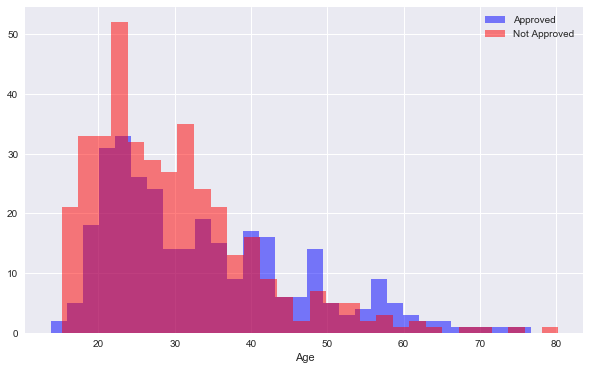

**Considering, x12 is amount in thousands, how x1 and x12 are relation, create a joint plot**

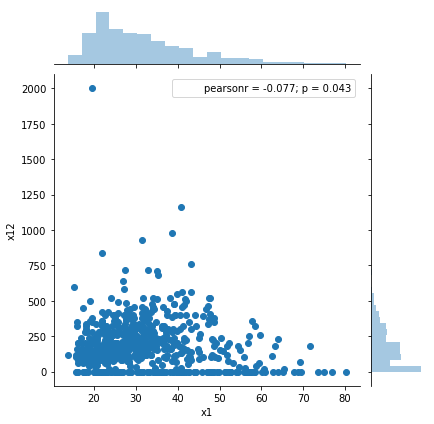

In [29]:
#Code here please, so that you dont lose the output
sns.jointplot(data=df, x='x1',y = 'x12')

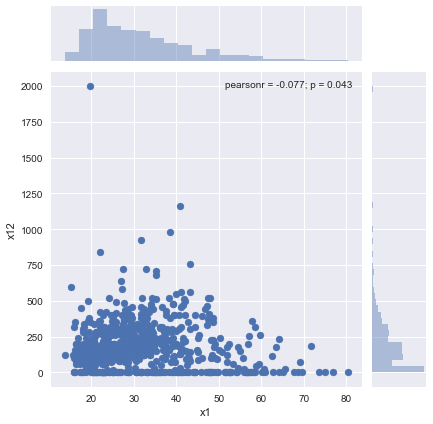

Let's move on to machine learning. 
## Machine Learning 

** Do the train test split, use test_size .30 and default value of random state at the moment**

In [30]:
#Code here please, so that you dont lose the output
from sklearn.model_selection import train_test_split

In [31]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
0,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [34]:
X = df.drop('target',axis=1)
y = df['target']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Importing and  training the Support Vector Classifier

**Import SVC and create its instance `svm_model`**

In [46]:
#Code here please, so that you dont lose the output
from sklearn.svm import SVC
svm_m= SVC()

**train the model please** 

In [47]:
#Code here please, so that you dont lose the output
svm_m.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Do the predictions please** 

In [48]:
#Code here please, so that you dont lose the output
y_perd = svm_m.predict(X_test)

**How the Classification report and Confusion matrix looks like?**

In [42]:
#Code here please, so that you dont lose the output
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_perd))
print(confusion_matrix(y_test,y_perd))

             precision    recall  f1-score   support

          0       0.60      0.98      0.75       137
          1       0.50      0.03      0.06        91

avg / total       0.56      0.60      0.47       228

[[134   3]
 [ 88   3]]


[[134   3]
 [ 88   3]]
             precision    recall  f1-score   support

          0       0.60      0.98      0.75       137
          1       0.50      0.03      0.06        91

avg / total       0.56      0.60      0.47       228



### Gridsearch

In [50]:
param_grid = {'C': [0.01,0.1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001]}

**parameter's values are given in `param_grid`, Do the gridsearch to find optimum value of C and gamma** Please don't use vebrose at the moment!

In [56]:
#Code here please, so that you dont lose the output
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(estimator =SVC(), param_grid =param_grid,  verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.01, gamma=1 .................................................
[CV] ........................................ C=0.01, gamma=1 -   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ........................................ C=0.01, gamma=1 -   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ........................................ C=0.01, gamma=1 -   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...................................... C=0.01, gamma=0.1 -   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...................................... C=0.01, gamma=0.1 -   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...................................... C=0.01, gamma=0.1 -   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................... C=0.01, gamma=0.0001 -   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................................... C=0.01, gamma=0.0001 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

**You may want to know the best values of your parameters!**

In [57]:
#Code here please, so that you dont lose the output
grid.best_params_


{'C': 1000, 'gamma': 0.0001}

{'C': 1000, 'gamma': 0.0001}

**Do the predictions using best values of your parameters and print confusion matrix and the classification report.**

In [59]:
#Code here please, so that you dont lose the output
y_gridPred = grid.predict(X_test)

In [60]:
print(confusion_matrix(y_test,y_gridPred))
print(classification_report(y_test,y_gridPred))

[[115  22]
 [ 35  56]]
             precision    recall  f1-score   support

          0       0.77      0.84      0.80       137
          1       0.72      0.62      0.66        91

avg / total       0.75      0.75      0.75       228



[[115  22]
 [ 35  56]]
             precision    recall  f1-score   support

          0       0.77      0.84      0.80       137
          1       0.72      0.62      0.66        91

avg / total       0.75      0.75      0.75       228



The model is improved after GridSearch but the prediction are not great. In the profession setup, you try different strategies including feature engineering along with using different models to see which one works best for your data. This section is specifically for the SVMs to learn how the model work and how to improve its performance.
# Excellent work!